In [2]:
#Import all necessary modules for the analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [4]:
#define a function that processes an excel file to give processed data
def process_world_bank_data(filename):
    """Reads the data from the given Excel file and returns a DataFrame, 
    cleans it, transposes it and splits it for desired analysis."""
    # Read the data
    df = pd.read_excel(filename)

    # Clean up the year columns to have just the year as the column name
    year_cols = [col.split(' ')[0] for col in df.columns[4:]]
    df.columns = list(df.columns[:4]) + year_cols

    # Handle Missing Values - Replace '..' with 0
    df.replace('..', 0, inplace=True)

    # Set the float format to suppress scientific notation
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    # Convert the columns to numeric types after replacement
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')

    # Drop Unnecessary Rows
    df = df.iloc[:80]

    # Split the data into separate DataFrames for each indicator
    indicator_dfs = _split_data_by_indicator(df)

    return indicator_dfs

def _split_data_by_indicator(df):
    """Splits the data into separate DataFrames for each indicator."""
    indicator_dfs = {}
    for indicator in df['Series Name'].unique():
        indicator_df = df[df['Series Name'] == indicator].copy()

        # Drop unnecessary columns
        indicator_df.drop(['Series Name', 'Series Code', 'Country Code'], axis=1, inplace=True)

        # Create two versions of the DataFrame: one with years as columns, one with countries as columns
        df_years_cols = indicator_df.set_index('Country Name')
        df_countries_cols = indicator_df.set_index('Country Name').stack().unstack(0)

        indicator_dfs[indicator] = (df_years_cols, df_countries_cols)

    return indicator_dfs
# Introduce the climate-Data file to be processed
file_path = 'Climate_Data_Extract_1990_2020_5Yr2.xlsx'

# Process the data using the function
processed_data = process_world_bank_data(file_path)

# Examine the keys of the processed data dictionary to identify different indicators
print(list(processed_data.keys()))



['Access to electricity (% of population)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'Forest area (% of land area)', 'Forest area (sq. km)', 'Renewable energy consumption (% of total final energy consumption)', 'Urban population (% of total population)', 'Total greenhouse gas emissions (kt of CO2 equivalent)']


In [5]:
# Access DataFrames for the indicator 'CO2 emissions (kt)', #test function correctness
df_years, df_countries = processed_data['CO2 emissions (kt)']

processed_data['CO2 emissions (kt)']

(                     1990       1995       2000       2005       2010  \
 Country Name                                                            
 Nigeria          72768.80   86164.50   97215.10   98719.00   90055.20   
 Brazil          197897.40  241283.80  313670.80  331689.10  397931.10   
 United States  4844517.40 5117036.90 5775807.20 5753493.20 5392109.40   
 China          2173364.20 3088620.20 3346525.80 5824625.10 8474922.70   
 India           563575.40  737856.40  937858.40 1136466.40 1659983.00   
 Germany         955307.70  874659.40  830284.10  802383.20  773069.10   
 United Kingdom  561774.50  526808.20  530888.20  540917.00  482646.20   
 Australia       263437.50  290141.50  339422.80  368801.90  395993.20   
 Costa Rica        2871.20    4809.80    4946.80    6273.90    7105.50   
 Bangladesh       11523.73   16554.48   20686.70   32710.80   50487.60   
 
                      2015        2020  
 Country Name                           
 Nigeria         107746.40  

In [6]:
#Store Processed Data as CSV
output_directory = 'processed_data'
os.makedirs(output_directory, exist_ok=True)

for indicator, (df_years, df_countries) in processed_data.items():
    if isinstance(indicator, str):  # To avoid saving non-indicator data like NaN

        # Round to 2 decimal places and ensure non-exponential format
        df_years = df_years.round(2)
        df_countries = df_countries.round(2)

        # Save to CSV files
        df_years.to_csv(f'{output_directory}/{indicator}_Years.csv')
        df_countries.to_csv(f'{output_directory}/{indicator}_Countries.csv')
        

#  **Exploratory Data Analysis**

## **Indicators**

For my analysis, certain indicators are likely to be of greater significance due to their direct relation to climate change and environmental impact and they include.
1. **CO2 Emissions**

2. **Renewable Energy Consumption**

3. **Forest Area**

4. **Total Greenhouse Gas Emissions**

## **Country Selection**

For country selection, there will be a focus on a mix of countries that are major contributors to global emissions, countries that are significantly impacted by climate change, and those that are leaders in renewable energy or environmental conservation these include:

1. **Major Emitters**: United States, China, India

2. **Impacted Countries**: Bangladesh (impacted by sea-level rise), Brazil (Amazon rainforest)

3. **Leaders in Renewable** Energy/Conservation: Germany (renewable energy), Costa Rica (conservation efforts)

In [7]:
# Extracting relevant data for the selected indicators and countries

# Selected indicators
indicators_of_interest = [
    'CO2 emissions (kt)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Forest area (% of land area)',
    'Total greenhouse gas emissions (kt of CO2 equivalent)'
]

# Selected countries
countries_of_interest = [
    'United States', 'China', 'India', 
    'Bangladesh', 'Brazil', 
    'Germany', 'Costa Rica'
]

# Extracting relevant data
relevant_data = {}
for indicator in indicators_of_interest:
    df_years, df_countries = processed_data[indicator]

    # Filter for selected countries
    df_filtered = df_years.loc[countries_of_interest]

    # Store in the dictionary
    relevant_data[indicator] = df_filtered

# Check one of the extracted DataFrames
relevant_data['CO2 emissions (kt)'].head(7)


,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,
United States,4844517.40,5117036.90,5775807.20,5753493.20,5392109.40,4990703.70,4320532.50
China,2173364.20,3088620.20,3346525.80,5824625.10,8474922.70,9859281.20,10944686.20
India,563575.40,737856.40,937858.40,1136466.40,1659983.00,2158023.20,2200836.30
Bangladesh,11523.73,16554.48,20686.70,32710.80,50487.60,73156.90,85493.10
Brazil,197897.40,241283.80,313670.80,331689.10,397931.10,485344.10,414138.80
Germany,955307.70,874659.40,830284.10,802383.20,773069.10,742314.40,603350.50
Costa Rica,2871.20,4809.80,4946.80,6273.90,7105.50,7537.90,6967.40


## **Climate Change Indicator: Summary Statistics Analysis**

In [8]:
# Exploratory Data Analysis - Summary Statistics using .describe()
summary_statistics = {indicator: data.describe() for indicator, data in relevant_data.items()}

# Displaying the summary statistics for each indicator
summary_statistics

{'CO2 emissions (kt)':             1990       1995       2000       2005       2010       2015  \
 count       7.00       7.00       7.00       7.00       7.00       7.00   
 mean  1249865.29 1440117.28 1604254.26 1983948.81 2393658.34 2616623.06   
 std   1757235.16 1939675.79 2168392.40 2630686.63 3273786.92 3643135.05   
 min      2871.20    4809.80    4946.80    6273.90    7105.50    7537.90   
 25%    104710.57  128919.14  167178.75  182199.95  224209.35  279250.50   
 50%    563575.40  737856.40  830284.10  802383.20  773069.10  742314.40   
 75%   1564335.95 1981639.80 2142192.10 3444979.80 3526046.20 3574363.45   
 max   4844517.40 5117036.90 5775807.20 5824625.10 8474922.70 9859281.20   
 
              2020  
 count        7.00  
 mean   2653714.97  
 std    3969557.40  
 min       6967.40  
 25%     249815.95  
 50%     603350.50  
 75%    3260684.40  
 max   10944686.20  ,
 'Renewable energy consumption (% of total final energy consumption)':        1990  1995  2000  2005  

## **Trend Analysis Over The Years & Distribution Analysis for 2020**

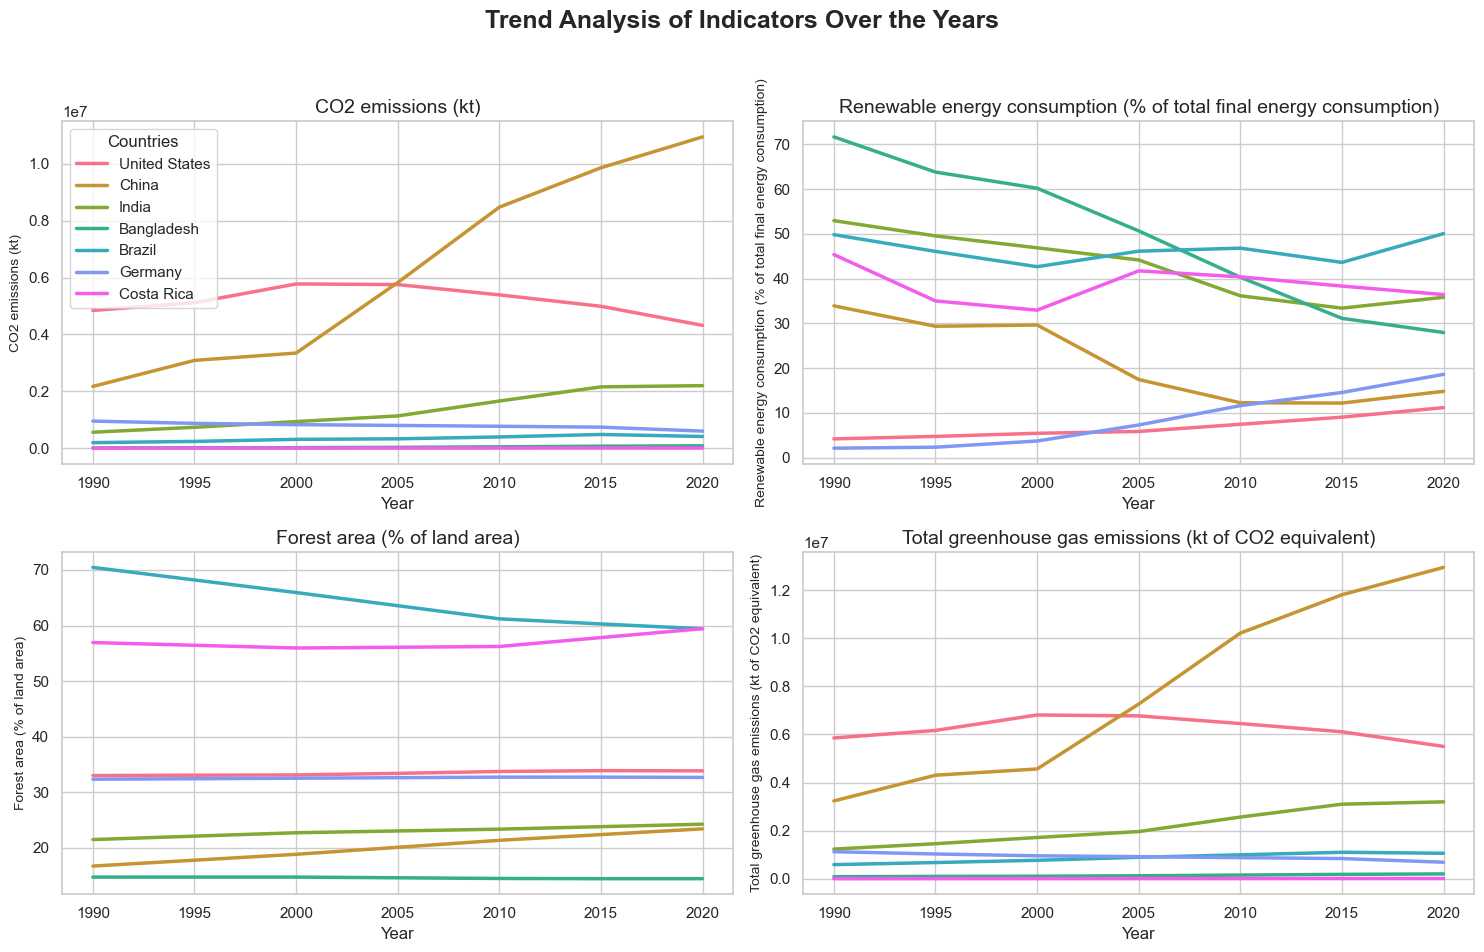

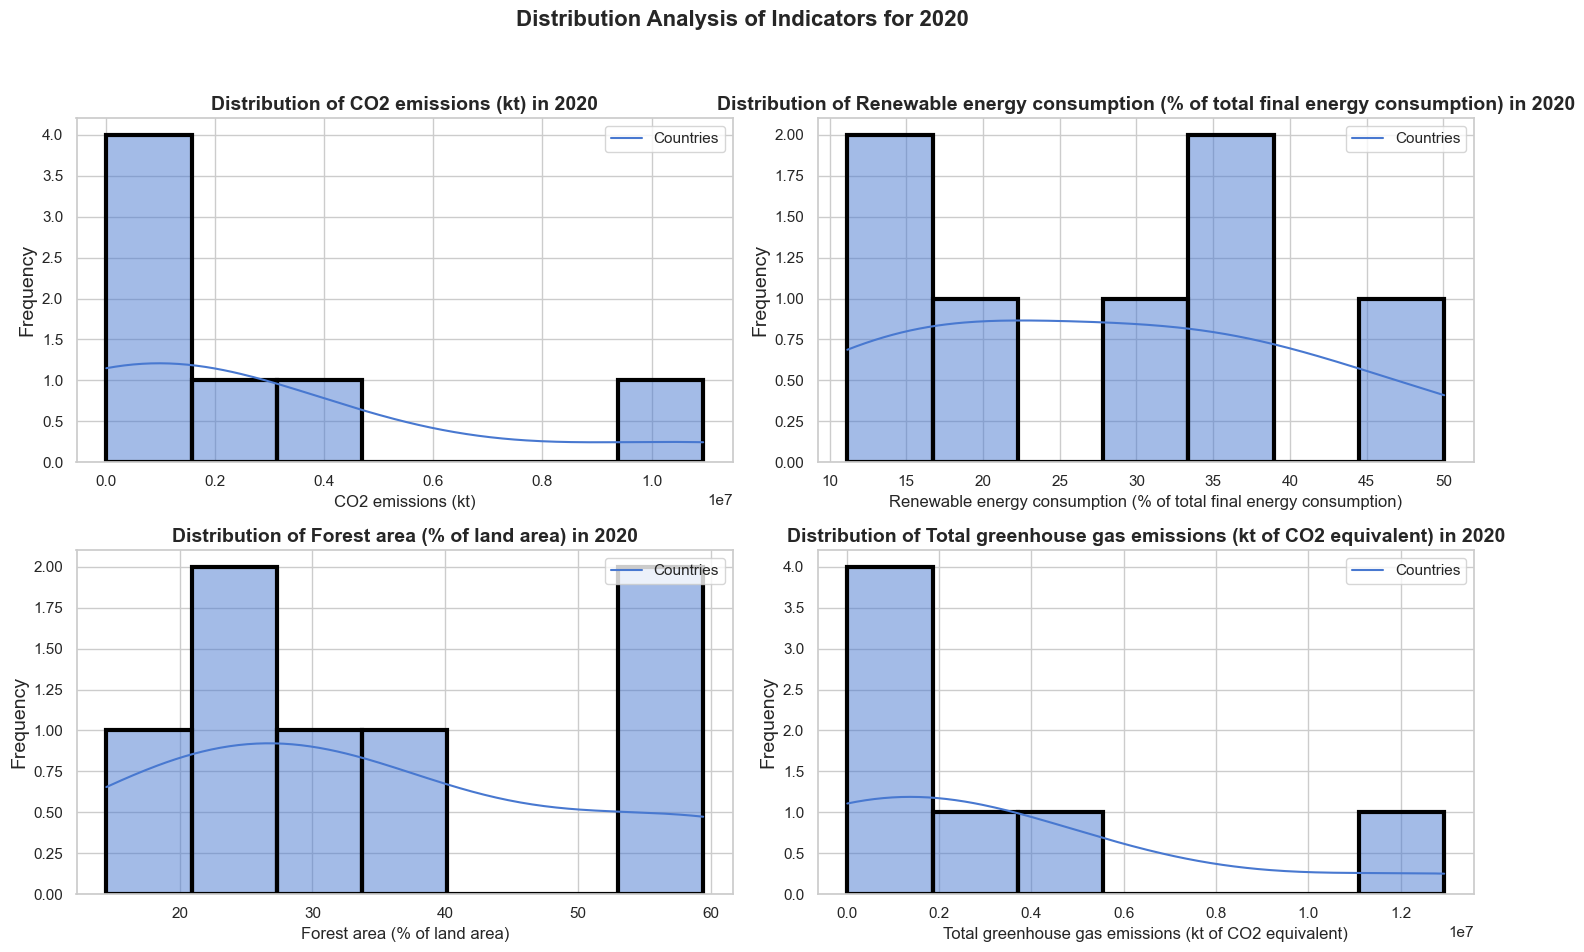

In [43]:
# Additional Statistical Analysis: Trend Analysis and Distribution Analysis for 2020

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Trend Analysis over the years
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Trend Analysis of Indicators Over the Years', fontsize=18, fontweight='bold')

for i, (indicator, data) in enumerate(relevant_data.items()):
    ax = axes[i//2, i%2]
    data.transpose().plot(ax=ax, title=indicator, legend=False, 
                          color=sns.color_palette("husl", n_colors=data.shape[1]), linewidth=2.5)
    ax.set_ylabel(indicator)
    ax.set_xlabel('Year')
    ax.title.set_fontsize(14)
    ax.yaxis.label.set_fontsize(10)
     
# Add legend title only to the first subplot to declutter plot area
    if i == 0:
        ax.legend(title='Countries')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure to a file
plt.savefig('Trend_analysis.png')

# Set Seaborn style
sns.set(style="whitegrid", palette="plasma")

# Distribution Analysis for 2020
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Analysis of Indicators for 2020', fontsize=16, fontweight='bold')

for i, (indicator, data) in enumerate(relevant_data.items()):
    ax = axes[i//2, i%2]
    sns.histplot(data['2020'], bins=7, kde=True, ax=ax, color=sns.color_palette("muted")[0],
                 linewidth=3, edgecolor='black')
    ax.set_title(f'Distribution of {indicator} in 2020', fontsize=14, fontweight='bold')
    ax.set_xlabel(indicator)
    ax.set_ylabel('Frequency')
    ax.title.set_fontsize(14)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(14)
    
    # Include axis legend ('Countries')
    ax.legend(['Countries'], loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]

### **Trend Analysis Over the Years**
The trend analysis charts for each indicator over the years provide interesting insights across indicators and countries

## **Correlation Analysis for the Relevant Data** 

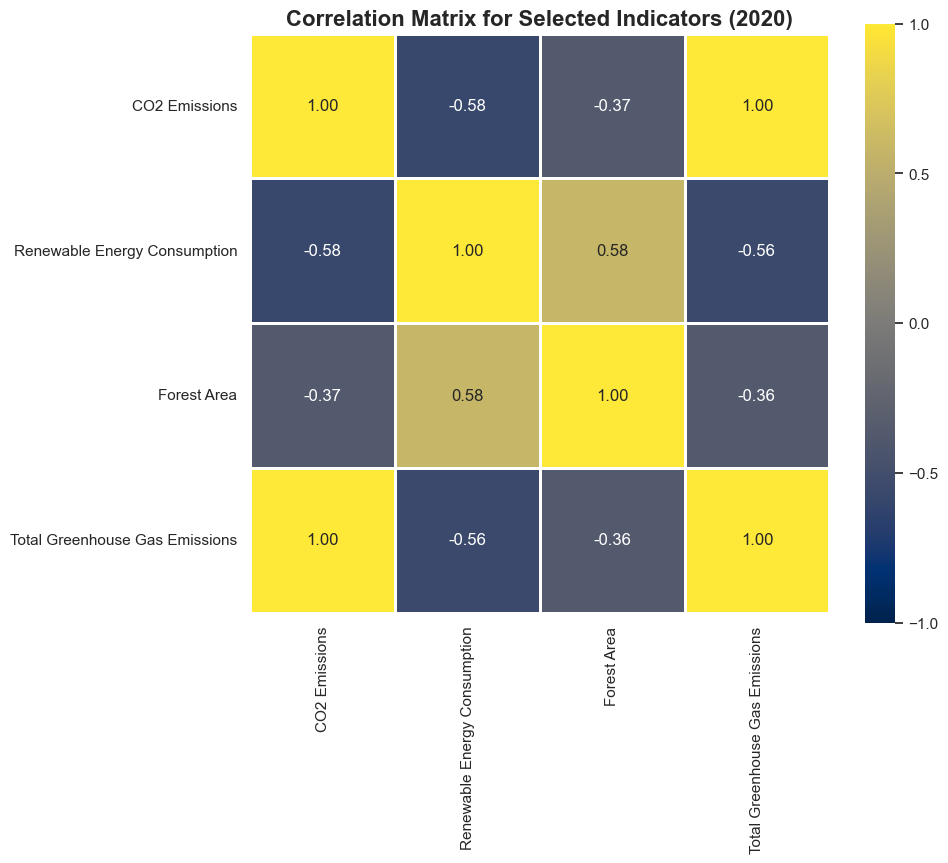

In [52]:
# Sample data for illustration purposes
data_2020 = pd.DataFrame({
    'CO2 Emissions': relevant_data['CO2 emissions (kt)']['2020'],
    'Renewable Energy Consumption': relevant_data['Renewable energy consumption (% of total final energy consumption)']['2020'],
    'Forest Area': relevant_data['Forest area (% of land area)']['2020'],
    'Total Greenhouse Gas Emissions': relevant_data['Total greenhouse gas emissions (kt of CO2 equivalent)']['2020']
})

# Correlation analysis
correlation_matrix = data_2020.corr()

# Set a different color palette for the heatmap
cmap = "cividis"

# Plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=1.0, square=True,
            cbar_kws={"shrink": 0.75, "ticks": [-1, -0.5, 0, 0.5, 1]}, vmin=-1, vmax=1)

# Add title and adjust layout
plt.title('Correlation Matrix for Selected Indicators (2020)', fontsize=16, fontweight='bold')
plt.tight_layout()


### **Analysis Summary:**
The correlation matrix provides insights into the interplay between energy use, forest management, and greenhouse gas emissions. The negative correlations involving renewable energy consumption with both CO2 and total greenhouse gas emissions underscore the importance of transitioning to renewable energy as a strategy for climate change mitigation. The positive relationship between renewable energy and forest area may reflect broader environmental stewardship in certain nations. The negative correlations between forest area and emissions stress the environmental value of forests. Overall, the matrix reinforces the interconnected nature of these indicators and the need for integrated approaches to address climate change.

Available countries: ['United States', 'China', 'India', 'Bangladesh', 'Brazil', 'Germany', 'Costa Rica']
Available countries: ['United States', 'China', 'India', 'Bangladesh', 'Brazil', 'Germany', 'Costa Rica']
Available countries: ['United States', 'China', 'India', 'Bangladesh', 'Brazil', 'Germany', 'Costa Rica']
Available countries: ['United States', 'China', 'India', 'Bangladesh', 'Brazil', 'Germany', 'Costa Rica']


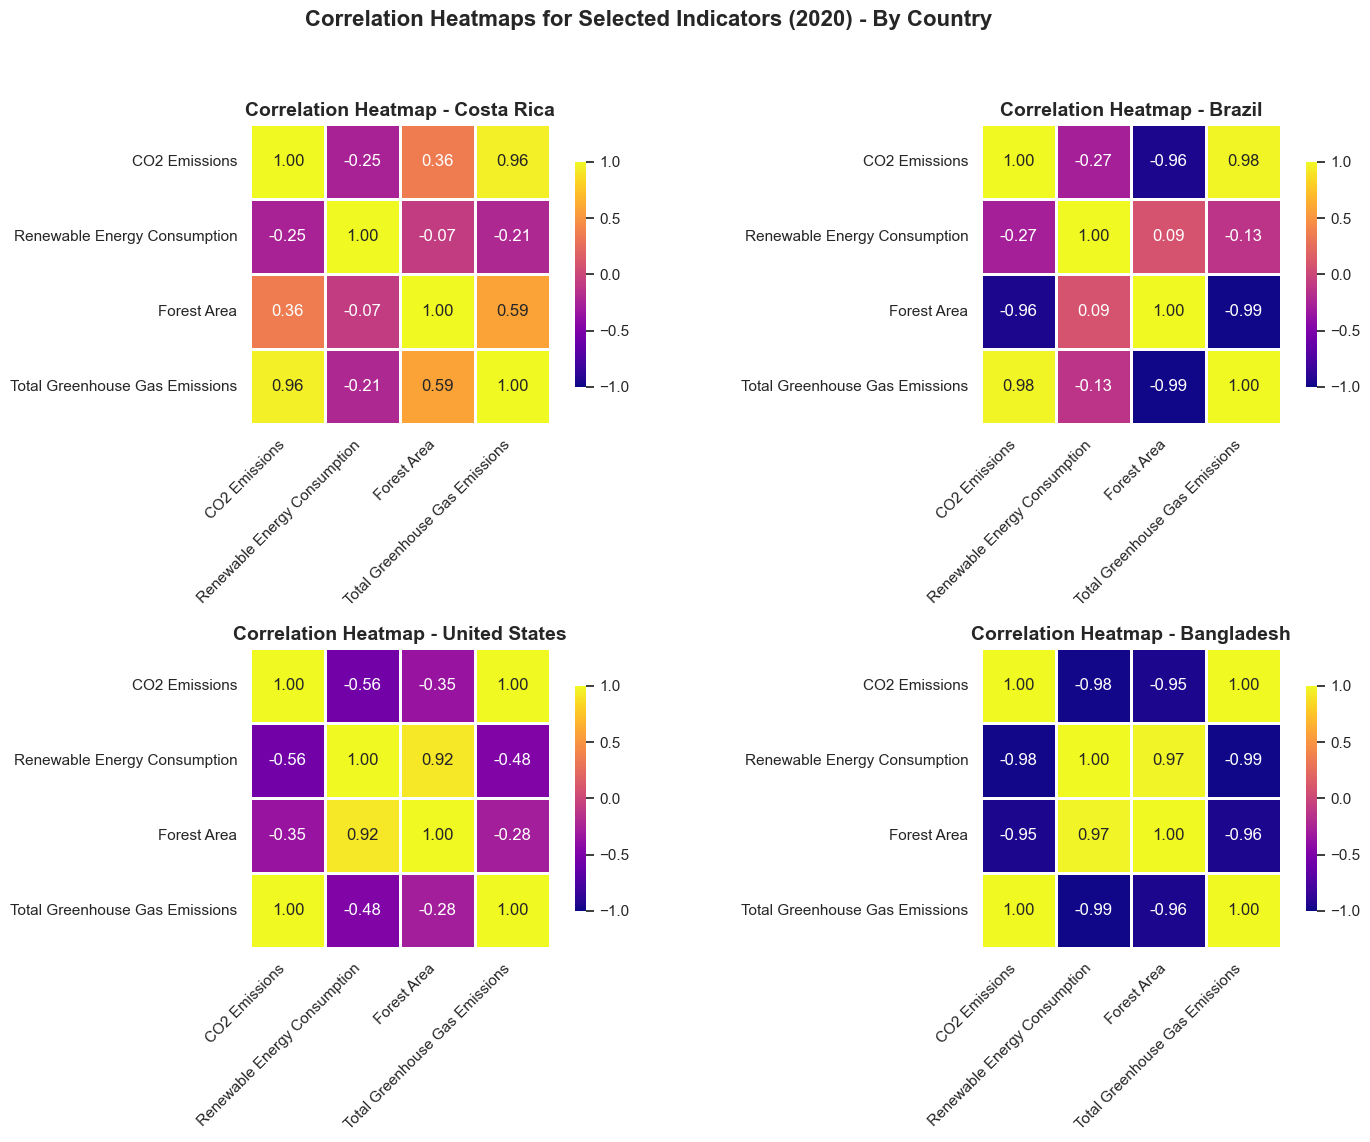

<Figure size 640x480 with 0 Axes>

In [44]:
# Compare correlation heatmaps across four selected countries
def plot_heatmaps_for_countries(data, countries):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Correlation Heatmaps for Selected Indicators (2020) - By Country', fontsize=16, fontweight='bold')

    for i, country in enumerate(countries):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        # Print available country names, review my 'relevant data'
        available_countries = data['CO2 emissions (kt)'].index.tolist()
        print(f"Available countries: {available_countries}")

        # Extract data for an existing country
        if country in available_countries:
            country_data = pd.DataFrame({
                'CO2 Emissions': data['CO2 emissions (kt)'].loc[country],
                'Renewable Energy Consumption': data['Renewable energy consumption (% of total final energy consumption)'].loc[country],
                'Forest Area': data['Forest area (% of land area)'].loc[country],
                'Total Greenhouse Gas Emissions': data['Total greenhouse gas emissions (kt of CO2 equivalent)'].loc[country]
            })

            # Calculate correlation matrix
            correlation_matrix = country_data.corr()

            # Plot heatmap
            sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=1.0, square=True,
                        cbar_kws={"shrink": 0.75, "ticks": [-1, -0.5, 0, 0.5, 1]}, vmin=-1, vmax=1, ax=ax)

            ax.set_title(f'Correlation Heatmap - {country}', fontsize=14, fontweight='bold')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# plot the heatmaps for the 4 selected countries
plot_heatmaps_for_countries(relevant_data, ['Costa Rica', 'Brazil', 'United States', 'Bangladesh'])